In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/no_preprocessing')
path_lm = Path('/home/ubuntu/data/autopsy/no_preprocessing')

batch_size=32
drop_mult=0.1
learning_rate=1e-3
wd=1e-7
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


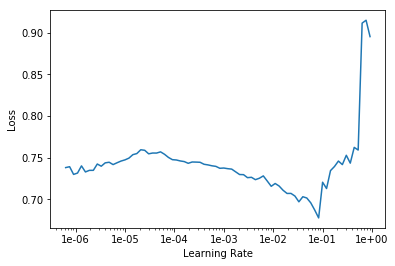

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.641783    0.600426    0.703863  (00:12)
2      0.603379    0.599206    0.738197  (00:11)
3      0.578699    0.527267    0.802575  (00:11)
4      0.561658    0.552465    0.763949  (00:10)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 09:39
epoch  train_loss  valid_loss  accuracy
1      0.593707    0.386596    0.815451  (00:25)
2      0.526826    0.397515    0.841202  (00:29)
3      0.439713    0.280353    0.888412  (00:32)
4      0.437281    0.290544    0.866953  (00:29)
5      0.407986    0.303028    0.901288  (00:27)
6      0.406253    0.290965    0.879828  (00:26)
7      0.355367    0.276352    0.875537  (00:30)
8      0.308276    0.281995    0.866953  (00:29)
9      0.358859    0.284794    0.866953  (00:30)
10     0.361794    0.302233    0.871245  (00:24)
11     0.318034    0.282049    0.888412  (00:30)
12     0.319420    0.245519    0.901288  (00:30)
13     0.292721    0.281012    0.892704  (00:31)
14     0.322081    0.236572    0.892704  (00:31)
15     0.333318    0.281493    0.892704  (00:25)
16     0.310803    0.296160    0.892704  (00:29)
17     0.282648    0.278791    0.866953  (00:30)
18     0.286129    0.267546    0.866953  (00:30)
19     0.356385    0.277116    0.871245  (00:25)
20     0.39

In [11]:
learn.validate()

[0.23251642, tensor(0.8841)]

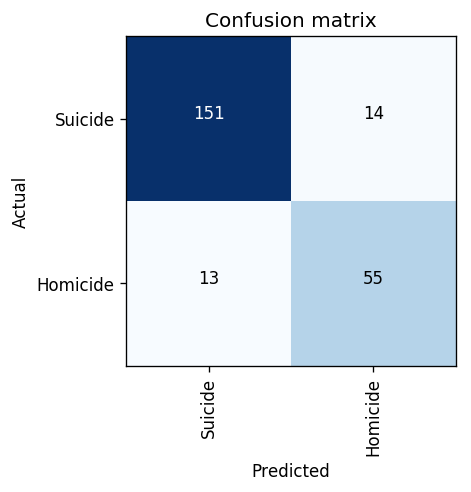

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

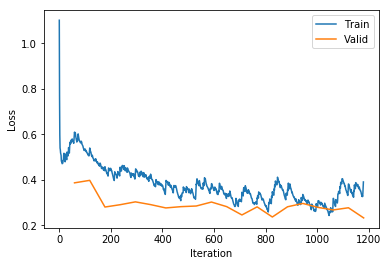

In [13]:
learn.recorder.plot_losses()

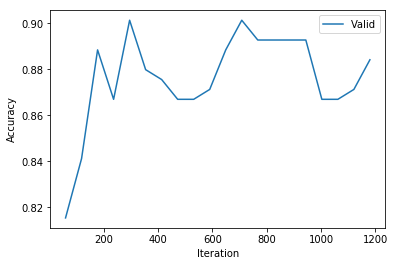

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


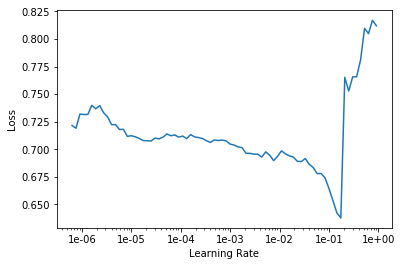

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.654163    0.583847    0.751073  (00:10)
2      0.605655    0.690647    0.605150  (00:12)
3      0.582157    0.547513    0.725322  (00:10)
4      0.537180    0.570161    0.733906  (00:12)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 12:01
epoch  train_loss  valid_loss  accuracy
1      0.546399    0.495554    0.759657  (00:26)
2      0.505880    0.349338    0.858369  (00:31)
3      0.479475    0.407980    0.819743  (00:30)
4      0.457742    0.340793    0.862661  (00:26)
5      0.397952    0.376843    0.858369  (00:28)
6      0.416387    0.264938    0.888412  (00:26)
7      0.377103    0.302219    0.866953  (00:26)
8      0.351591    0.325992    0.866953  (00:26)
9      0.340400    0.271595    0.892704  (00:31)
10     0.354414    0.288840    0.896996  (00:25)
11     0.287181    0.257466    0.892704  (00:30)
12     0.287027    0.443705    0.849785  (00:27)
13     0.314420    0.324222    0.879828  (00:26)
14     0.346943    0.286982    0.901288  (00:25)
15     0.268821    0.277880    0.879828  (01:01)
16     0.290842    0.313007    0.866953  (00:52)
17     0.240350    0.392917    0.849785  (01:03)
18     0.287458    0.236592    0.901288  (00:50)
19     0.315069    0.262089    0.892704  (00:52)
20     0.31

In [20]:
learn.validate()

[0.2870556, tensor(0.8712)]

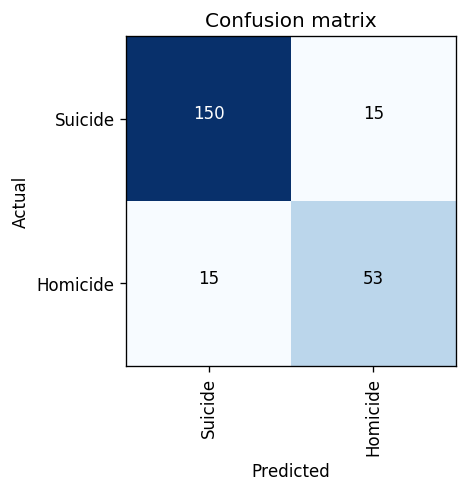

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

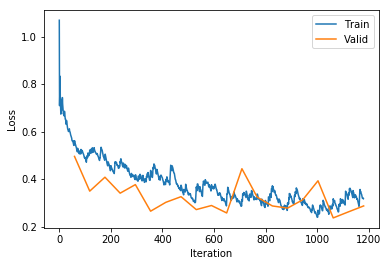

In [22]:
learn.recorder.plot_losses()

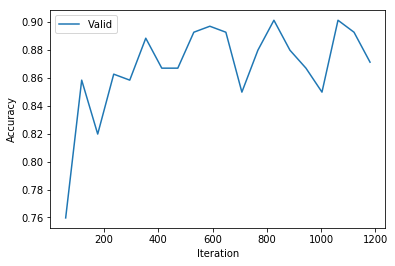

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


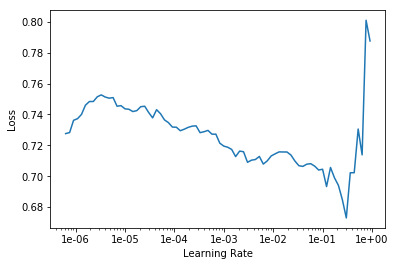

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 01:21
epoch  train_loss  valid_loss  accuracy
1      0.644429    0.570028    0.716738  (00:26)
2      0.603016    0.553336    0.772532  (00:21)
3      0.570618    0.607040    0.733906  (00:14)
4      0.549032    0.674977    0.626609  (00:19)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 17:09
epoch  train_loss  valid_loss  accuracy
1      0.579544    0.910619    0.506438  (01:02)
2      0.642630    0.608307    0.665236  (00:59)
3      0.653402    0.613683    0.686695  (00:49)
4      0.671701    0.605327    0.695279  (00:40)
5      0.614287    0.522191    0.699571  (01:02)
6      0.628529    0.580392    0.708154  (00:56)
7      0.613747    0.570524    0.686695  (00:54)
8      0.584450    0.518879    0.716738  (00:51)
9      0.588514    0.514931    0.725322  (01:01)
10     0.604385    0.578369    0.703863  (01:01)
11     0.607510    0.561879    0.708154  (00:57)
12     0.614773    0.582873    0.712446  (00:43)
13     0.618201    0.567671    0.703863  (00:53)
14     0.603449    0.559834    0.703863  (01:02)
15     0.609306    0.566789    0.703863  (00:53)
16     0.598853    0.617776    0.665236  (00:52)
17     0.602700    0.599674    0.673820  (00:25)
18     0.590884    0.612352    0.673820  (00:29)
19     0.554694    0.505710    0.772532  (00:35)
20     0.55

In [29]:
learn.validate()

[0.6000656, tensor(0.7039)]

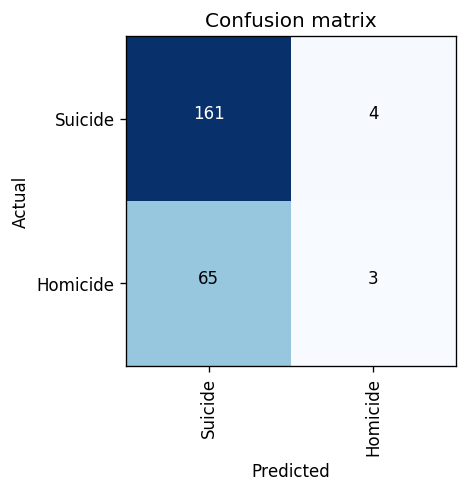

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

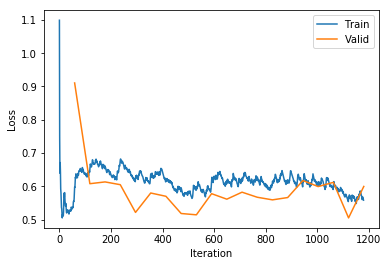

In [31]:
learn.recorder.plot_losses()

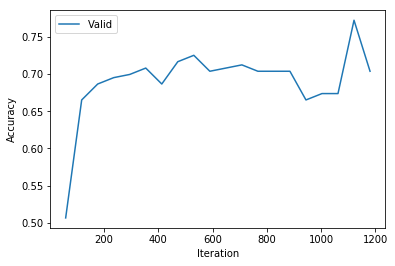

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


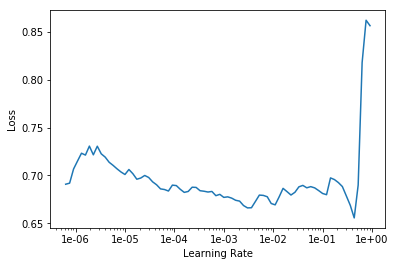

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 01:25
epoch  train_loss  valid_loss  accuracy
1      0.622817    0.585950    0.763949  (00:24)
2      0.598519    0.496258    0.793991  (00:22)
3      0.552909    0.543181    0.738197  (00:16)
4      0.520934    0.551429    0.738197  (00:23)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 16:42
epoch  train_loss  valid_loss  accuracy
1      0.586433    0.566904    0.729614  (00:49)
2      0.519605    0.447404    0.828326  (00:57)
3      0.494525    0.517676    0.798283  (00:48)
4      0.471523    0.407728    0.845494  (00:43)
5      0.422316    0.422986    0.841202  (00:54)
6      0.370068    0.343236    0.854077  (01:00)
7      0.401142    0.347031    0.884120  (00:40)
8      0.382457    0.380065    0.854077  (00:30)
9      0.373091    0.351718    0.871245  (00:43)
10     0.346848    0.352452    0.854077  (01:00)
11     0.386441    0.277355    0.901288  (00:50)
12     0.340664    0.333974    0.871245  (00:42)
13     0.319794    0.258937    0.905579  (00:56)
14     0.310781    0.306859    0.871245  (00:50)
15     0.317910    0.248422    0.905579  (00:53)
16     0.286283    0.299623    0.884120  (00:52)
17     0.311280    0.241799    0.905579  (00:59)
18     0.299521    0.414610    0.819743  (00:52)
19     0.294760    0.351499    0.841202  (00:43)
20     0.31

In [38]:
learn.validate()

[0.25085744, tensor(0.9056)]

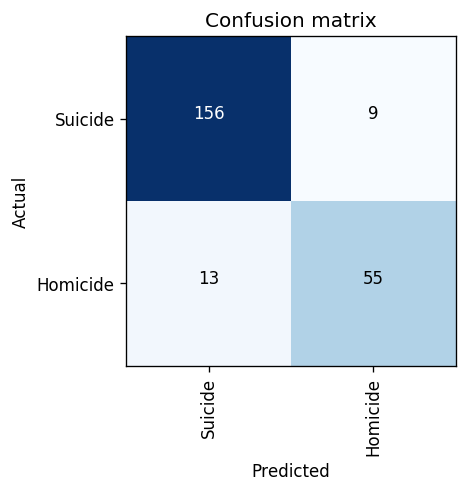

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

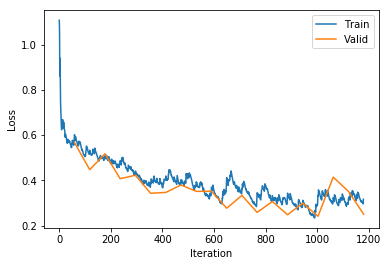

In [40]:
learn.recorder.plot_losses()

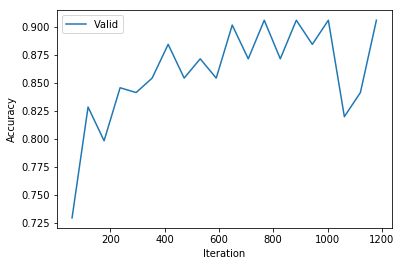

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


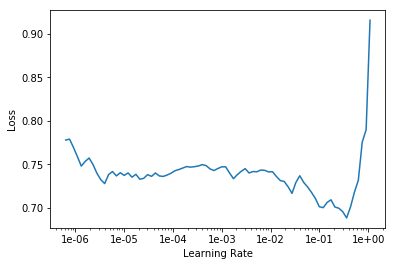

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 01:19
epoch  train_loss  valid_loss  accuracy
1      0.707090    0.640850    0.669528  (00:20)
2      0.644495    0.531666    0.772532  (00:21)
3      0.593661    0.628838    0.656652  (00:17)
4      0.547775    0.699925    0.656652  (00:19)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 12:04
epoch  train_loss  valid_loss  accuracy
1      0.538107    0.460879    0.802575  (00:53)
2      0.487904    0.367400    0.862661  (00:48)
3      0.448847    0.335308    0.862661  (00:57)
4      0.406295    0.350421    0.866953  (00:44)
5      0.363889    0.297431    0.862661  (00:54)
6      0.393659    0.412798    0.836910  (00:47)
7      0.353771    0.330444    0.849785  (00:53)
8      0.353096    0.274930    0.884120  (00:26)
9      0.343761    0.335480    0.871245  (00:25)
10     0.333411    0.305052    0.884120  (00:28)
11     0.323248    0.294120    0.875537  (00:29)
12     0.330098    0.303720    0.888412  (00:26)
13     0.301128    0.264354    0.896996  (00:32)
14     0.281247    0.295138    0.888412  (00:30)
15     0.296992    0.245494    0.901288  (00:27)
16     0.283963    0.313704    0.854077  (00:27)
17     0.273893    0.277539    0.884120  (00:31)
18     0.275572    0.240200    0.896996  (00:26)
19     0.341036    0.292862    0.888412  (00:25)
20     0.28

In [47]:
learn.validate()

[0.24500276, tensor(0.9056)]

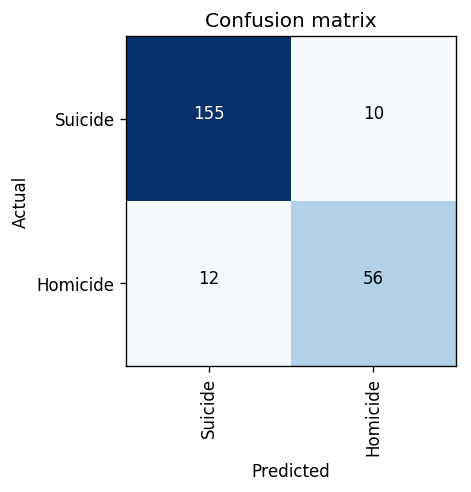

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

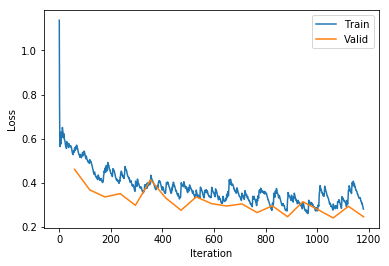

In [49]:
learn.recorder.plot_losses()

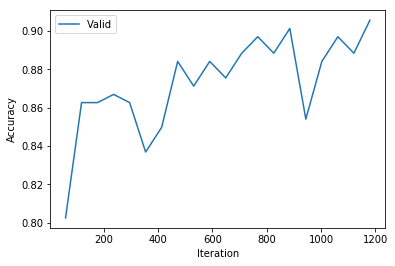

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.8841201663017273, 0.8712446093559265, 0.7038626670837402, 0.9055793881416321, 0.9055793881416321]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.8540772438049317


In [53]:
#We are now done doing 5-fold cross validation 

In [54]:
#Now train with all the training data and evaluate with the test data

In [55]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [56]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained_grad_no_preprocessing')

learn.freeze()


In [57]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:53
epoch  train_loss  valid_loss  accuracy
1      0.628058    0.597223    0.722008  (00:14)
2      0.595266    0.506564    0.810811  (00:11)
3      0.567105    0.516006    0.764479  (00:11)
4      0.481354    0.426606    0.849421  (00:15)



In [58]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 10:43
epoch  train_loss  valid_loss  accuracy
1      0.498515    0.304347    0.872587  (00:34)
2      0.359064    0.259019    0.899614  (00:37)
3      0.374887    0.261804    0.911197  (00:29)
4      0.320232    0.273700    0.903475  (00:33)
5      0.324382    0.254036    0.899614  (00:31)
6      0.302275    0.217105    0.911197  (00:32)
7      0.241900    0.209574    0.915058  (00:33)
8      0.244696    0.236747    0.915058  (00:33)
9      0.241376    0.257539    0.895753  (00:32)
10     0.316405    0.231809    0.911197  (00:28)
11     0.257124    0.213698    0.918919  (00:33)
12     0.238034    0.326391    0.849421  (00:30)
13     0.203465    0.217260    0.915058  (00:34)
14     0.296103    0.221003    0.918919  (00:27)
15     0.219369    0.219928    0.915058  (00:33)
16     0.215217    0.216439    0.915058  (00:32)
17     0.240915    0.227601    0.911197  (00:29)
18     0.235188    0.222158    0.899614  (00:31)
19     0.277998    0.212125    0.903475  (00:28)
20     0.26

In [59]:
learn.validate()

[0.20373395, tensor(0.9112)]

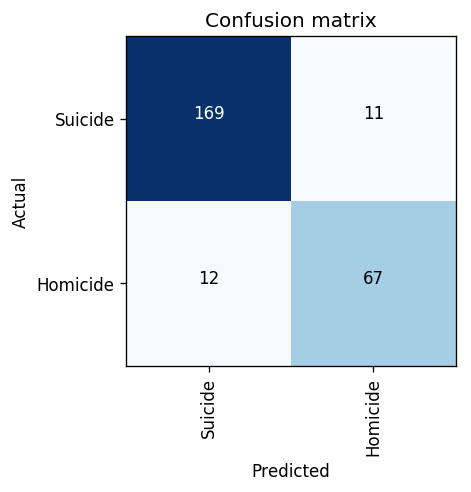

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [61]:
import torch

torch.cuda.empty_cache()